# Aula 3 - Seaborn

[Documentação Seaborn](https://seaborn.pydata.org/tutorial/introduction.html)

### Imports e Configurações

In [ ]:
# importando a biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# definindo as configurações

# autoreload permite a recarga dos módulos antes da execução dos códigos
# doc: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%reload_ext autoreload
%autoreload 2

# magic function do matplotlib para renderizar gráficos estáticos logo abaixo,
# no output do jupyter, fazendo a junção do backend do matplotlib com front-end
# do jupyter notebook
%matplotlib inline

# define o estilo
sns.set_style('white')

### Carregando as Bases de Dados

In [4]:
# importando a base 'flights' do seaborn
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [5]:
# importando a base 'penguins' do seaborn
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Gráficos

Processo de plotagem:
1. entender os dados
2. entender a questão de negócio
3. ~~realizar as transformações necessárias~~
4. realizar o plot

Documentação:

* https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions
* https://seaborn.pydata.org/api.html#function-interface

#### Gráfico de Barras

In [6]:
# observando a base de dados
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a quantidade de pinguins por ilha?

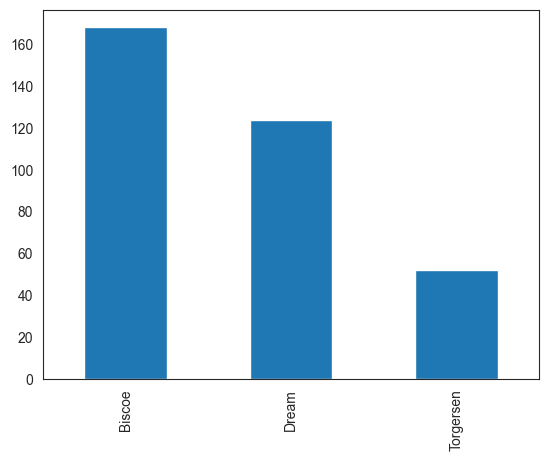

In [7]:
# como seria com plot do pandas?
penguins['island'].value_counts().plot(kind='bar')
plt.show()


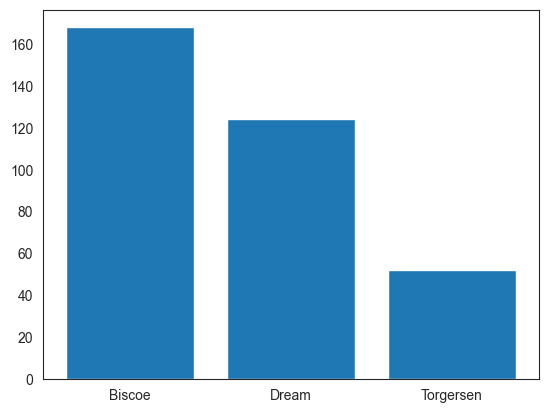

In [12]:
# como seria com plot do matplotlib?
x_bar = penguins['island'].value_counts().index
y_bar = penguins['island'].value_counts().values
plt.bar(x_bar, y_bar)
plt.show()

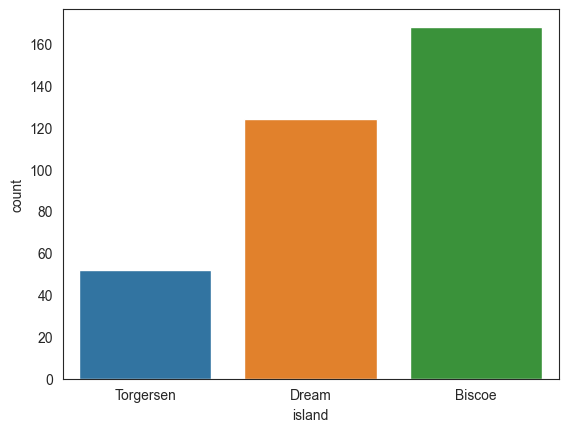

In [14]:
# visualizando com o seaborn - countplot
# definir ordem pelo index: penguins['island'].value_counts(ascending=True).index
sns.countplot(data=penguins, x='island', order=penguins['island'].value_counts(ascending=True).index)
plt.show()


Qual a quantidade de pinguins por ilha e segmentado por sexo?

In [17]:
# como seria com pandas plot?
pd.get_dummies(penguins, columns=['sex']) \
    .groupby(['island','sex']) \
    .sum()


KeyError: 'sex'

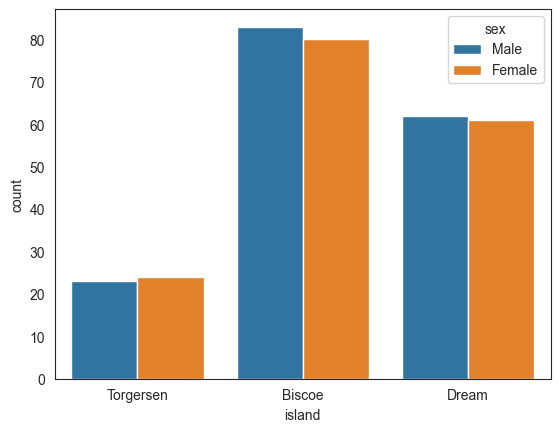

In [16]:
# visualizando com o seaborn - countplot
sns.countplot(data=penguins, x='island', hue='sex')
plt.show()

Qual a média do comprimento da nadadeira por ilha, segmentado por espécie?

In [18]:
# mudando o estilo para darkgrid
sns.set_style('darkgrid')


In [19]:
# base de dados pinguins
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='island'>

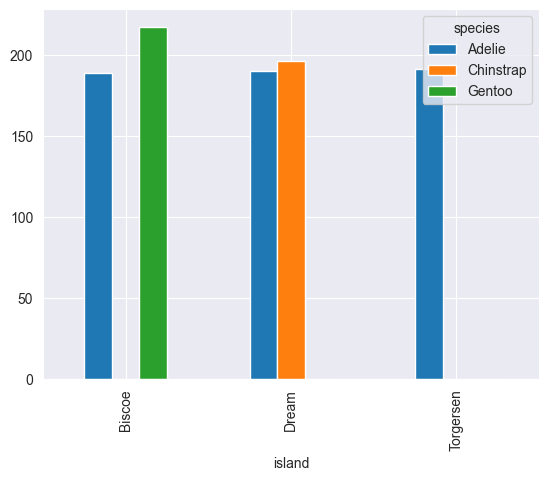

In [23]:
# utilizando o pandas plot
penguins.groupby(['island', 'species'])['flipper_length_mm'] \
    .mean() \
    .reset_index() \
    .pivot('island', 'species', 'flipper_length_mm') \
    .plot(kind='bar')


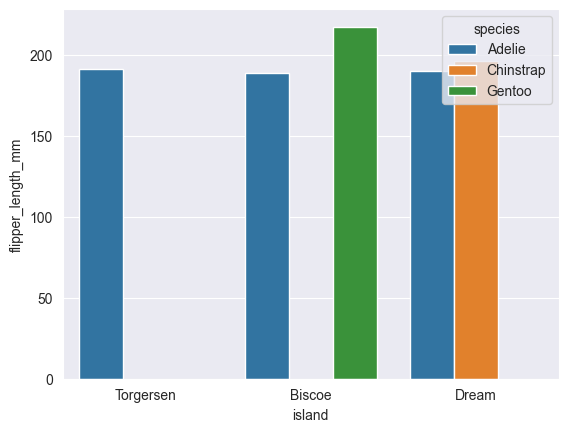

In [27]:
# utilizando o seaborn - barplot

sns.barplot(data=penguins, x='island', y='flipper_length_mm', hue='species', estimator='mean', errorbar=None)
plt.show()

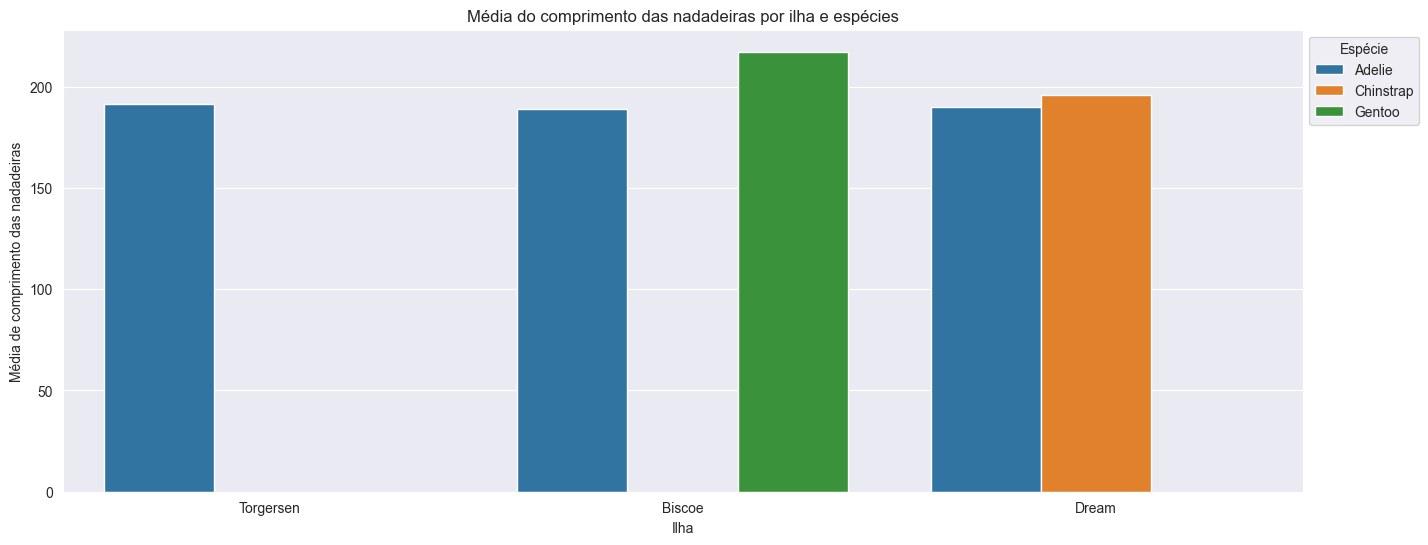

In [38]:
# adicionando título, rótulos de eixo, ajustando legenda e tamanho

plt.figure(figsize=(16, 6))

# Transformações e plot
sns.barplot(data=penguins, x='island', y='flipper_length_mm', hue='species', estimator='mean', errorbar=None)

# Estética
plt.title('Média do comprimento das nadadeiras por ilha e espécies')
plt.xlabel('Ilha')
plt.ylabel('Média de comprimento das nadadeiras')
plt.legend(title='Espécie',loc='upper left', bbox_to_anchor=(1, 1))

# Show
plt.show()

#### Gráfico de Linhas

In [39]:
# base de dados flights
flights.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Qual a quantidade de passageiros por ano?

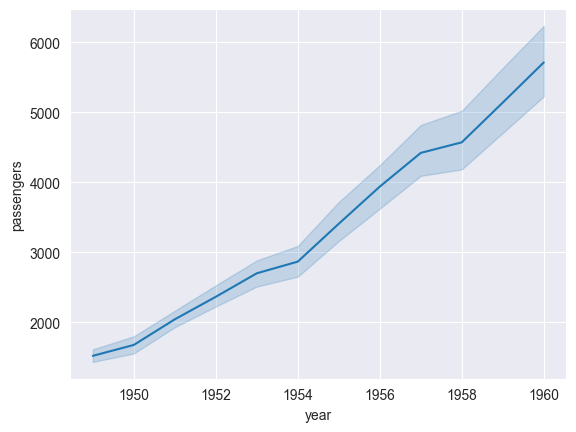

In [43]:
# visualizando o total de passageiros por ano com seaborn - lineplot
sns.lineplot(data=flights, x='year', y='passengers', estimator='sum')
plt.show()


Qual a média de passageiros por ano?

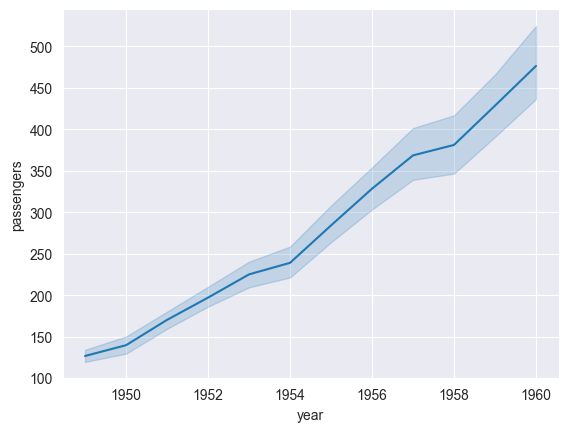

In [44]:
# visualizando a média de passageiros por ano com seaborn - lineplot

sns.lineplot(data=flights, x='year', y='passengers', estimator='mean')
plt.show()

Qual a quantidade de passageiros por ano, segmentado por mês?

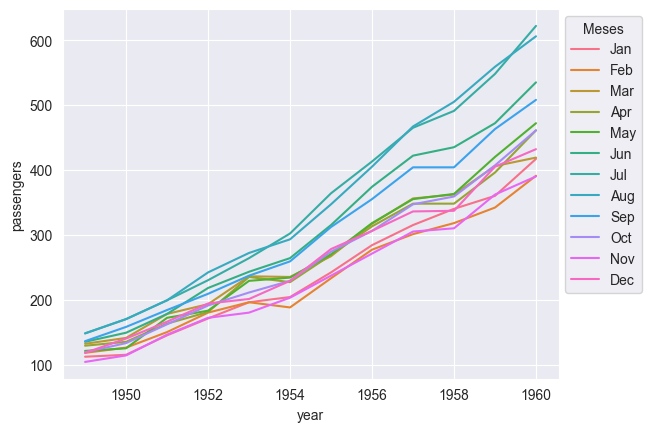

In [47]:
# visualizando com seaborn - lineplot

sns.lineplot(data=flights, x='year', y='passengers', estimator='sum', hue='month')
plt.legend(title='Meses', loc='upper left', bbox_to_anchor=(1,1))
plt.show()

#### Gráfico de Caixa

In [48]:
# base de dados penguins

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Temos outliers no peso corporal dos pinguins?

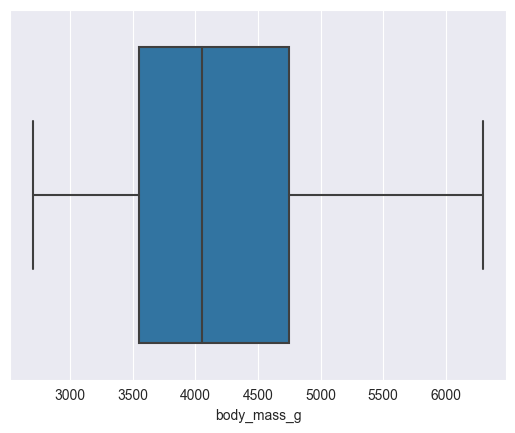

In [49]:
# visualizando a distibuição com seaborn - boxplot

sns.boxplot(data=penguins, x='body_mass_g')
plt.show()

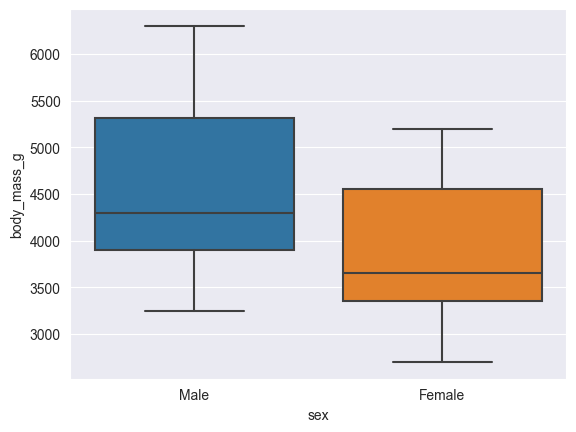

In [51]:
# segmentando a distribuição por sexo

sns.boxplot(data=penguins, y='body_mass_g', x='sex')
plt.show()

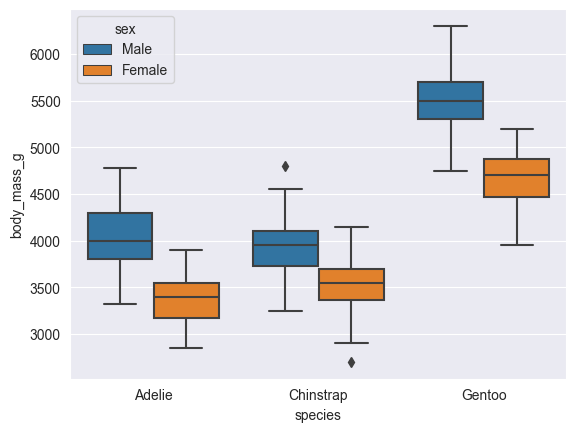

In [53]:
# segmentando a distribuição por sexo e espécie

sns.boxplot(data=penguins, y='body_mass_g', x='species', hue='sex')
plt.show()

#### Gráfico de Dispersão

In [54]:
# base de dados pinguins
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Qual a relação entre o comprimento e a profundidade do bico

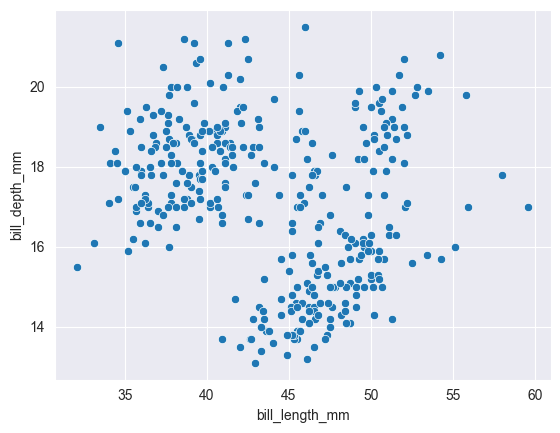

In [55]:
# visualizando com seaborn - scatterplot

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

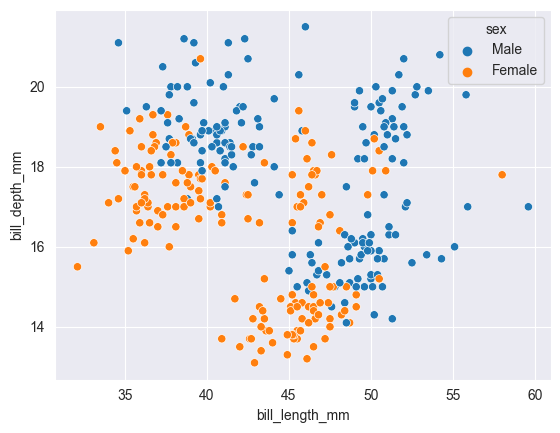

In [56]:
# segmentando por sexo

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='sex')
plt.show()

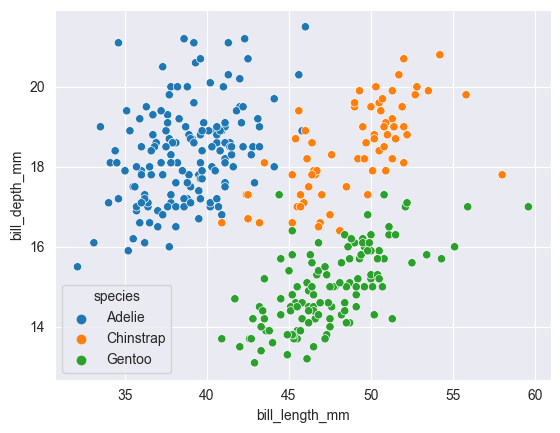

In [57]:
# segmentando por espécie

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

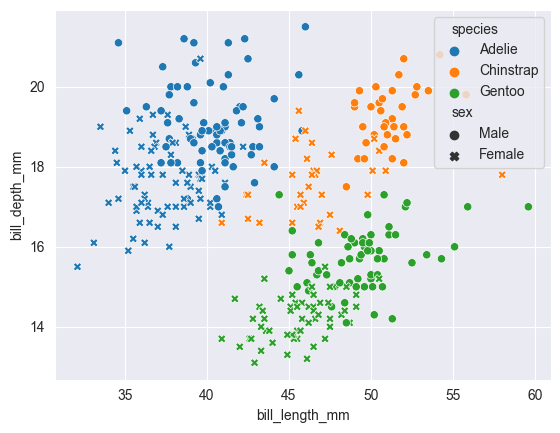

In [58]:
# segmentando por espécie e sexo com o parâmetro style

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex')
plt.show()

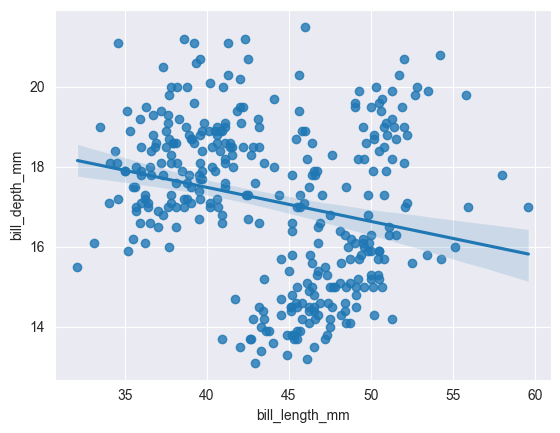

In [59]:
# visualizando com seaborn - regplot

sns.regplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

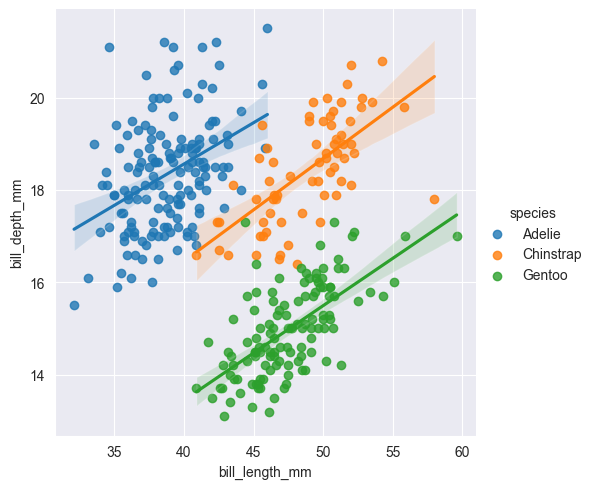

In [60]:
# visualizando com seaborn - lmplot
# segmentando por espécie

sns.lmplot(data=penguins, 
            x='bill_length_mm', 
            y='bill_depth_mm', 
            hue='species')
plt.show()

#### Pairplot para Analise Exploratória

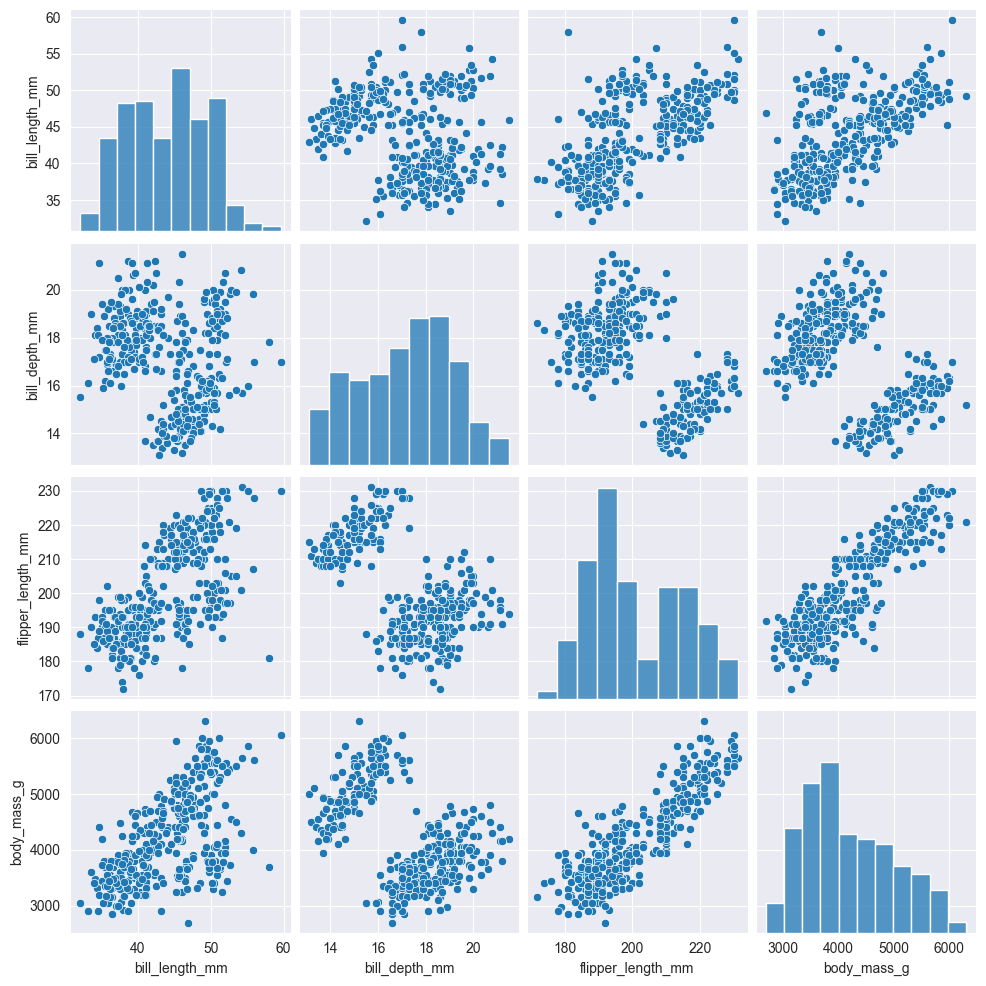

In [61]:
# Observando a relação entre todas variáveis numéricas

sns.pairplot(data=penguins)
plt.show()

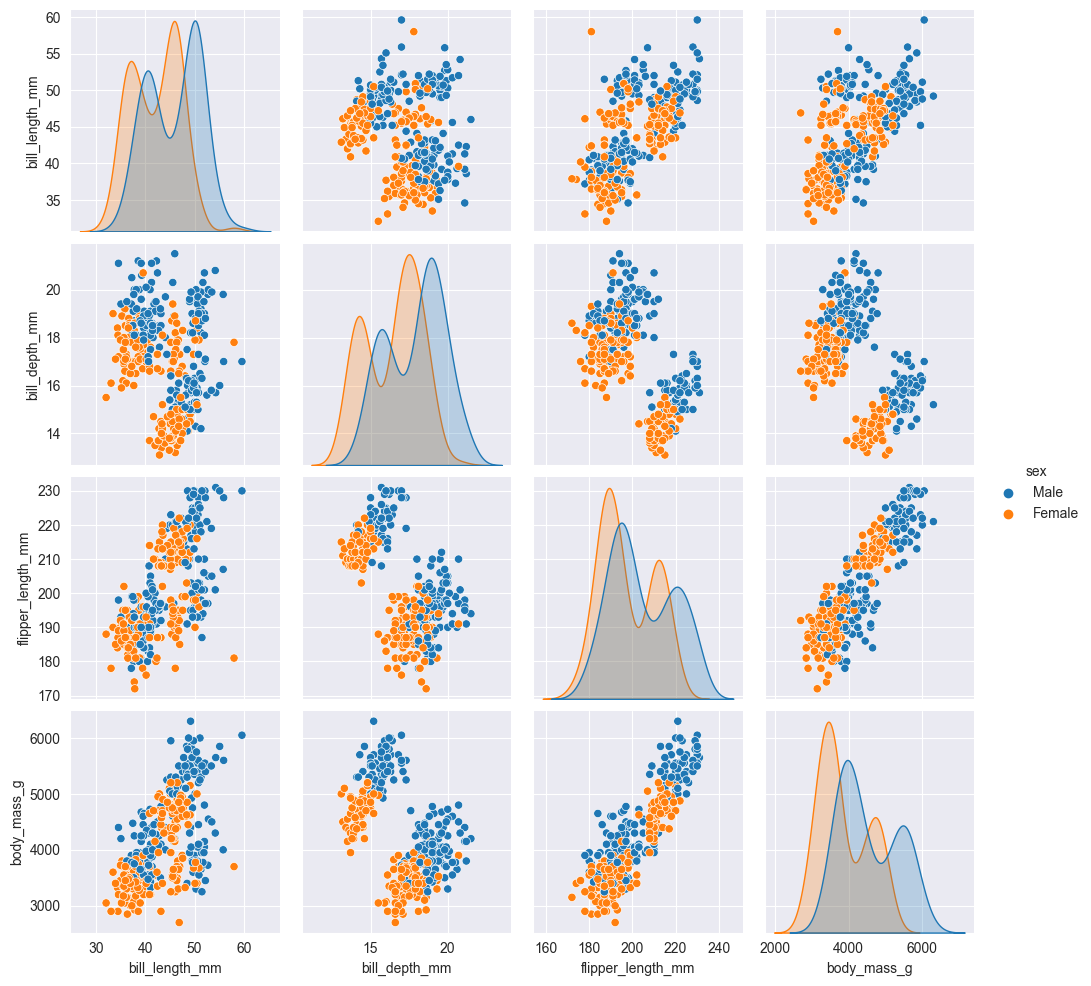

In [62]:
# Observando a relação entre todas variáveis numéricas segmentado por sexo

sns.pairplot(data=penguins, hue='sex')
plt.show()

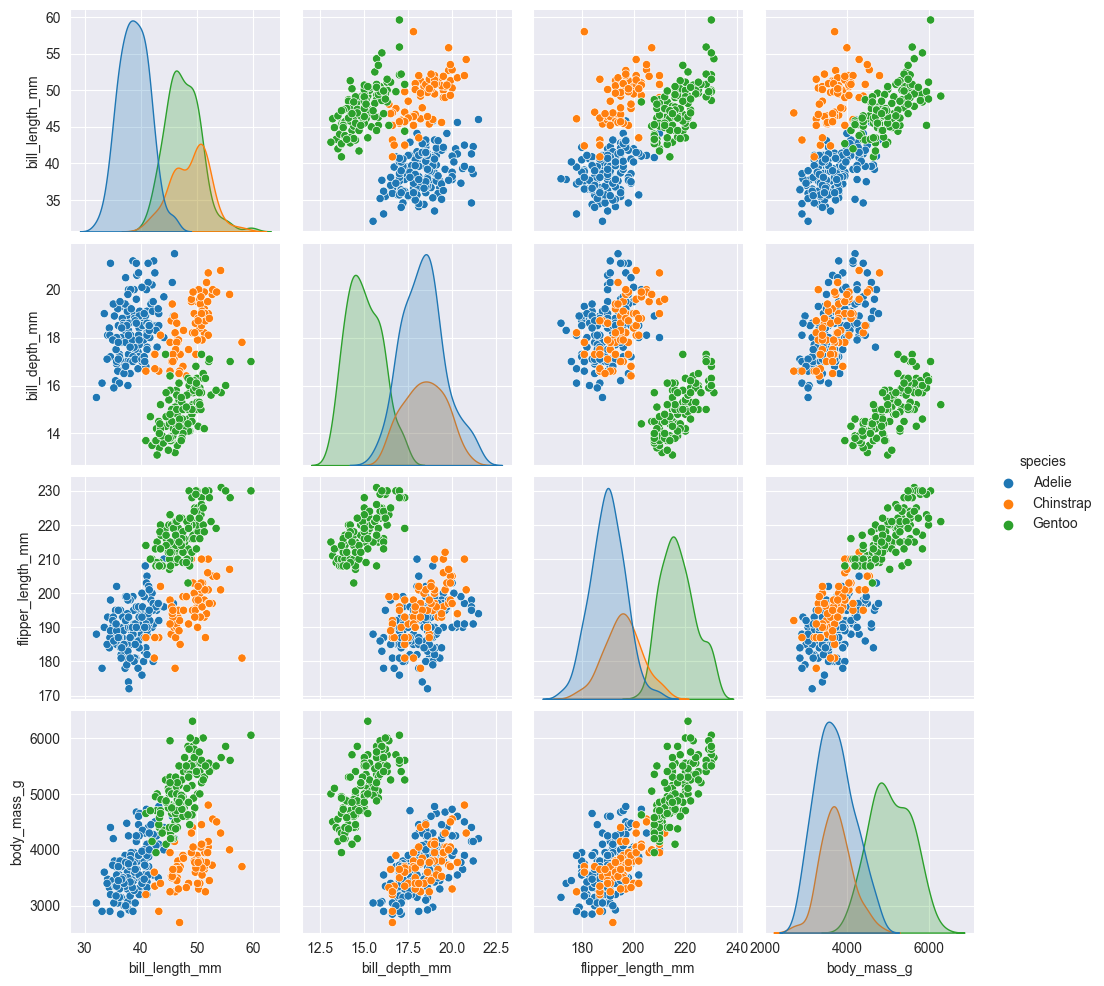

In [63]:
# Observando a relação entre todas variáveis numéricas segmentado por espécie

sns.pairplot(data=penguins, hue='species')
plt.show()

### Atividade

Resolver as questões abaixo. Em seguida, criar um repositório público no GitHub e armazenar no notebook criado, enviando somente o link do NOTEBOOK para o [Formulário](https://docs.google.com/forms/d/e/1FAIpQLSf8IUCLt4kowhHhB3SRQofE2I8NuXuDadBYjRHqUxgb3yWOaQ/viewform).

Para resolver as questões abaixo utilizar o dataset 'tips' do seaborn.

*According to the tips dataset documentation, the Tips dataset is a data frame with 244 rows and 7 variables which represents some tipping data where one waiter recorded information about each tip he received over a period of a few months working in one restaurant. In all the waiter recorded 244 tips. The data was reported in a collection of case studies for business statistics (Bryant & Smith 1995).[4] The waiter collected several variables: The **tip** in dollars, the **bill** in dollars, the **sex** of the bill payer, whether there were **smokers** in the party, the **day** of the week, the **time** of day and the **size** of the party.*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### Questão 1

Qual o valor médio da gorjeta (*tip*) de acordo com o dia da semana (*day*)?

#### Questão 2

Qual a soma das gorjetas (*tip*) por turno do dia (*time*), observando os fumantes e não fumantes (*smoker*)?

#### Questão 3

Verique a distribuição de gorjetas (*tip*) por dia (*day*) e turno (*time*). Há algum dia e turno com maior presença de outliers?

#### Questão 4

Qual a relação do valor total da conta com o valor da gorjeta?

#### Questão 5

Qual público dá maior quantidade de gorjetas:


1.   Homens ou mulheres?
2.   Fumantes ou não fumantes?

